In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [34]:
df_prueba = pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_prueba = df_prueba.rename(columns={"concept:name": "Operation", "Variant": "concept:name"})

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['q-y'] = df_prueba['Question'] + '-' + df_prueba['Year']
df_prueba

df_prueba
# reports = pd.read_excel("./Reports BPI Challenge.xlsx")
# reports['BPI Challenge'] = reports['BPI Challenge'].fillna(method='pad')

# reports['BPI Challenge'] = reports['BPI Challenge'].astype(int)
# reports["BPI Challenge"]=reports["BPI Challenge"].apply(str)

# reports["Unnamed: 1"]=reports["Unnamed: 1"].apply(str)
# reports['Tupla'] = reports['Unnamed: 1'] + reports["BPI Challenge"]

# df_prueba["Year"]=df_prueba["Year"].apply(str)
# df_prueba['Tupla'] = df_prueba['Report'] + df_prueba["Year"]

# sLength = len(df_prueba['Tupla'])
# df_prueba['Organization'] = pd.Series(np.random.randn(sLength), index=df_prueba.index)

# df_prueba['prueba']= ""
# df_prueba.drop(['Organization', 'prueba'], axis=1)

,case:id,case:concept:name,Operation,concept:name,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization,q-y
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-30 12:54:15.489743,P2,A1,2020,Academic,Analyze Time,A12020,"Technische Universität, Berlin",P2-2020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-30 13:54:15.489743,P2,A1,2020,Academic,Analyze Time,A12020,"Technische Universität, Berlin",P2-2020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-30 14:54:15.489743,P2,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University",P2-2020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-30 15:54:15.489743,P2,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University",P2-2020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-30 16:54:15.489743,P2,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...,P2-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2022-01-08 19:54:15.489743,P1,A19,2020,Professional,Manipulation,A192020,Sberbank,P1-2020
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2022-01-08 20:54:15.489743,P1,A19,2020,Professional,Manipulation,A192020,Sberbank,P1-2020
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-01-08 21:54:15.489743,P1,A19,2020,Professional,Calculate statistics,A192020,Sberbank,P1-2020
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2022-01-08 22:54:15.489743,P1,A19,2020,Professional,Analyze Time,A192020,Sberbank,P1-2020


In [4]:
# lista=[]
# df_prueba['Organization'] = ""
# for d in range(len(df_prueba)):
#     for r in range(len(reports)):
#         if(df_prueba.loc[d]['Tupla'] == reports.loc[r]['Tupla']):
# #             print('si')
# #             print(reports.iloc[r]['Universidad/Organización'])
# #             lista.append(reports.loc[r]['Universidad/Organización'])
#              df_prueba.iloc[d]['Organization'] = reports.loc[r]['Universidad/Organización']
    
# df_prueba.drop(['prueba'], axis=1)

In [35]:
df_report_year = df_prueba.groupby(by=['Question', 'Year'])
for name, group in df_report_year:
    operations = group['concept:name'].to_list()

In [36]:
df_analisis = df_prueba.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Organization', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Organization']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Organization':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)
    
df_agrupado

,case:concept:name,Operations,Organization,Year,Question
0,A1 P1 BPI 2017,[Calculate cycle time of the whole process for...,University of Liechtenstein\nVienna University...,2017,P1
1,A1 P1 BPI 2020,"[Filter traces by activities, Calculate cycle ...","Technische Universität, Berlin",2020,P1
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time of...",University of Melbourne,2019,P2
3,A1 P2 BPI 2020,[Calculate cycle time of the whole process for...,"Technische Universität, Berlin",2020,P2
4,A1 P5 BPI 2015,[Calculate cycle time of the whole process for...,Meijer & Van der Ham Management Consultants,2015,P5
...,...,...,...,...,...
121,A8 P1 BPI 2017,"[Filter traces by activities, Calculate waitin...",Universidade Federal do Estado do Rio de Janeiro,2017,P1
122,A8 P5 BPI 2015,[Calculate cycle time of the whole process for...,GRADIENT ECM,2015,P5
123,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",POSTECH,2017,P1
124,A9 P2 BPI 2019,"[Filter traces by year, Calculate cycle time o...",KPMG Netherlands,2019,P2


In [17]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [18]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
#     print("similitud: "+str(float(tamIntersection)/tamUnion))
    return float(tamIntersection)/tamUnion

In [19]:
def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [20]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','question','overlap', 'jaccard', 'sorensen']
df_metricas_preguntas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name[1])
    for i in range(len(group)):
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
            question = name[1] + name[0]
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis, 'question':question, 'overlap': overlap, 'jaccard':jaccard, 'sorensen':sorensen} 
            df_metricas_preguntas = df_metricas_preguntas.append(new_row, ignore_index=True)

In [21]:
df_metricas_preguntas

,analisis,question,overlap,jaccard,sorensen
0,A1 P5 BPI 2015-A2 P5 BPI 2015,P52015,0.250000,0.071429,0.133333
1,A1 P5 BPI 2015-A3 P5 BPI 2015,P52015,0.000000,0.000000,0.000000
2,A1 P5 BPI 2015-A4 P5 BPI 2015,P52015,0.250000,0.071429,0.133333
3,A1 P5 BPI 2015-A5 P5 BPI 2015,P52015,0.363636,0.210526,0.347826
4,A1 P5 BPI 2015-A6 P5 BPI 2015,P52015,0.250000,0.117647,0.210526
...,...,...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000,0.000000,0.000000
982,A30 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.666667,0.500000,0.666667
983,A35 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000,0.000000,0.000000
984,A35 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.000000,0.000000,0.000000


In [22]:
estadisticas = df_metricas_preguntas.groupby(by=['question']).mean()
estadisticas

,overlap,jaccard,sorensen
question,,,
P12017,0.315713,0.127903,0.215111
P12020,0.222988,0.098453,0.160635
P22019,0.247110,0.103563,0.181426
P22020,0.287582,0.160511,0.210835
P42020,0.142525,0.053441,0.081389
P52015,0.239864,0.100497,0.171585
P52020,0.253064,0.139825,0.199665
P62020,0.209402,0.120167,0.169516


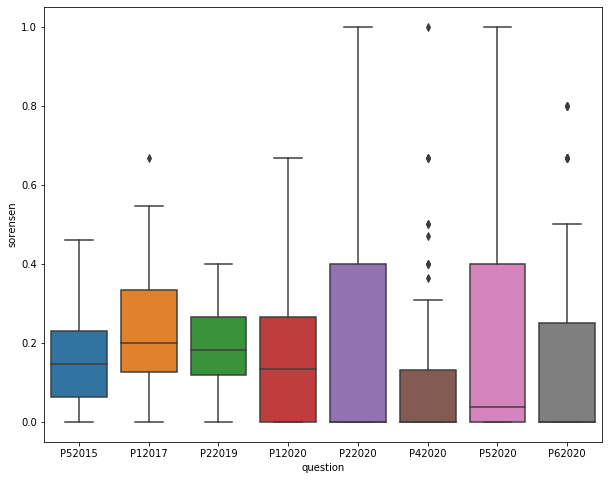

In [23]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="sorensen", data=df_metricas_preguntas)

In [16]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].var(ddof=0)

question
P12017    0.050370
P12020    0.091253
P22019    0.039969
P22020    0.195602
P42020    0.145853
P52015    0.031217
P52020    0.096569
P62020    0.098267
Name: overlap, dtype: float64

In [17]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].std(ddof=0)

question
P12017    0.224433
P12020    0.302081
P22019    0.199922
P22020    0.442269
P42020    0.381907
P52015    0.176684
P52020    0.310756
P62020    0.313476
Name: overlap, dtype: float64

In [18]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].var(ddof=0)

question
P12017    0.018178
P12020    0.023376
P22019    0.010497
P22020    0.105758
P42020    0.034494
P52015    0.012649
P52020    0.061416
P62020    0.041510
Name: jaccard, dtype: float64

In [19]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].std(ddof=0)

question
P12017    0.134824
P12020    0.152892
P22019    0.102453
P22020    0.325204
P42020    0.185724
P52015    0.112468
P52020    0.247823
P62020    0.203740
Name: jaccard, dtype: float64

In [20]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].var(ddof=0)

question
P12017    0.026660
P12020    0.040301
P22019    0.015537
P22020    0.124199
P42020    0.055338
P52015    0.020958
P52020    0.068057
P62020    0.053474
Name: sorensen, dtype: float64

In [21]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].std(ddof=0)

question
P12017    0.163280
P12020    0.200751
P22019    0.124647
P22020    0.352419
P42020    0.235239
P52015    0.144770
P52020    0.260877
P62020    0.231245
Name: sorensen, dtype: float64

In [40]:
#enfrentando todos los analisis con todos
df2 = df_agrupado
df2 = df2.rename(columns={"Operations":"concept:name"})
columns=['analisis','question','overlap', 'jaccard', 'sorensen']
df_metricas_preguntas = pd.DataFrame(columns=columns)

for i in range(len(df2)):       
    for j in range(i+1,len(df2)):
        grupo = df2.iloc[i]['concept:name']
        analisis = df2.iloc[i]['case:concept:name'] + "-" + df2.iloc[j]['case:concept:name']
        question = df2.iloc[i]['Question'] + df2.iloc[i]['Year'] +"-"+ df2.iloc[j]['Question'] + df2.iloc[j]['Year']
        sorensen = sorensenIndex(grupo,df2.iloc[j]['concept:name'])
        overlap = overlapIndex(grupo,df2.iloc[j]['concept:name'])
        jaccard = jaccardIndex(grupo,df2.iloc[j]['concept:name'])
        new_row={'analisis':analisis, 'question':question, 'overlap': overlap, 'jaccard':jaccard, 'sorensen':sorensen} 
        df_metricas_preguntas = df_metricas_preguntas.append(new_row, ignore_index=True)

In [42]:
df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P52015':'P52015-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P52015':'P52015-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P52015':'P52015-P42020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P22020-P52015':'P52015-P22020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P12020-P52015':'P52015-P12020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P12017':'P12017-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P12017':'P12017-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P12017':'P12017-P42020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P22020-P12017':'P12017-P22020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P12020-P12017':'P12017-P12020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P22019':'P22019-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P22019':'P22019-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P22019':'P22019-P42020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P22020-P22019':'P22019-P22020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P12020-P22019':'P22019-P12020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P12017-P52015':'P52015-P12017'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P22019-P52015':'P52015-P22019'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P22019-P12017':'P12017-P22019'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P12020':'P12020-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P12020':'P12020-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P12020':'P12020-P42020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P22020-P12020':'P12020-P22020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P22020':'P22020-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P22020':'P22020-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P22020':'P22020-P42020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P42020':'P22020-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P42020':'P22020-P52020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P52020':'P52020-P62020'})
df_metricas_preguntas

,analisis,question,overlap,jaccard,sorensen
0,A1 P1 BPI 2017-A1 P1 BPI 2020,P12017-P12020,0.000000,0.000000,0.000000
1,A1 P1 BPI 2017-A1 P2 BPI 2019,P12017-P22019,0.000000,0.000000,0.000000
2,A1 P1 BPI 2017-A1 P2 BPI 2020,P12017-P22020,0.500000,0.090909,0.166667
3,A1 P1 BPI 2017-A1 P5 BPI 2015,P52015-P12017,0.100000,0.050000,0.095238
4,A1 P1 BPI 2017-A1 P5 BPI 2020,P12017-P52020,0.000000,0.000000,0.000000
...,...,...,...,...,...
7870,A8 P5 BPI 2015-A9 P2 BPI 2019,P52015-P22019,0.250000,0.105263,0.190476
7871,A8 P5 BPI 2015-A9 P5 BPI 2015,P52015-P52015,0.555556,0.294118,0.454545
7872,A9 P1 BPI 2017-A9 P2 BPI 2019,P12017-P22019,0.000000,0.000000,0.000000
7873,A9 P1 BPI 2017-A9 P5 BPI 2015,P52015-P12017,0.000000,0.000000,0.000000


In [44]:
df_metricas_preguntas.groupby(['question']).mean().round(2)

,overlap,jaccard,sorensen
question,,,
P12017-P12017,0.32,0.13,0.22
P12017-P12020,0.16,0.05,0.09
P12017-P22019,0.17,0.06,0.11
P12017-P22020,0.06,0.02,0.03
P12017-P42020,0.11,0.04,0.06
P12017-P52020,0.22,0.07,0.12
P12017-P62020,0.19,0.06,0.11
P12020-P12020,0.22,0.10,0.16
P12020-P22020,0.13,0.05,0.09


In [45]:
round(df_metricas_preguntas.groupby(['question']).var(ddof=0), 2)

C:\Users\maria\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  """Entry point for launching an IPython kernel.


,overlap,jaccard,sorensen
question,,,
P12017-P12017,0.04,0.01,0.02
P12017-P12020,0.05,0.01,0.02
P12017-P22019,0.04,0.00,0.01
P12017-P22020,0.02,0.00,0.01
P12017-P42020,0.04,0.00,0.01
P12017-P52020,0.06,0.01,0.02
P12017-P62020,0.05,0.01,0.02
P12020-P12020,0.06,0.01,0.03
P12020-P22020,0.06,0.01,0.02


In [46]:
round(df_metricas_preguntas.groupby(['question']).std(ddof=0), 2)

,overlap,jaccard,sorensen
question,,,
P12017-P12017,0.21,0.09,0.14
P12017-P12020,0.22,0.07,0.12
P12017-P22019,0.19,0.07,0.11
P12017-P22020,0.15,0.04,0.07
P12017-P42020,0.19,0.06,0.10
P12017-P52020,0.24,0.08,0.13
P12017-P62020,0.22,0.07,0.12
P12020-P12020,0.25,0.12,0.18
P12020-P22020,0.24,0.10,0.15


In [48]:
df_metricas_preguntas.groupby(['question']).mean().describe()

,overlap,jaccard,sorensen
count,36.000000,36.000000,36.000000
mean,0.160699,0.064402,0.104539
std,0.068123,0.036957,0.053004
min,0.049800,0.015631,0.027792
25%,0.112099,0.035448,0.063140
50%,0.161158,0.059020,0.102277
75%,0.217586,0.080275,0.126135
max,0.315713,0.160511,0.215111


In [28]:
df_prueba = pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
# df_prueba = df_prueba.rename(columns={"concept:name": "Operation", "Variant": "concept:name"})

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['q-y'] = df_prueba['Question'] + '-' + df_prueba['Year']
df_prueba

df3 = df_prueba.groupby(['q-y'])
for name, group in df3:
#     print(name)
    mean = group['Variant'].value_counts().mean()
    if(name == "P5-2015"):
        opu_P52015 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P1-2017'):
        opu_P12017 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P2-2019'):
        opu_P22019 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P1-2020'):
        opu_P12020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P2-2020'):
        opu_P22020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P4-2020'):
        opu_P42020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P5-2020'):
        opu_P52020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P6-2020'):
        opu_P62020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index

In [29]:
#to show commom variants between questions
opu_4_5_2020 = set(opu_P42020).intersection(set(opu_P52020))
opu_4_5_6_2020 = opu_4_5_2020.intersection(set(opu_P62020))
opu_6_5_2020 = set(opu_P62020).intersection(set(opu_P52020))
opu_6_4_2020 = set(opu_P62020).intersection(set(opu_P42020))

In [30]:
opu_1_17_5_20 = set(opu_P12017).intersection(set(opu_P52020))
opu_1_17_5_6_20 = opu_1_17_5_20.intersection(set(opu_P62020))
opu_6_5_2020 = set(opu_P62020).intersection(set(opu_P52020))
opu_1_17_6_2020 = set(opu_P62020).intersection(set(opu_P12017))

In [31]:
opu_1_20_5_15 = set(opu_P12020).intersection(set(opu_P52015))
opu_1_20_5__15_2_19 = opu_1_20_5_15.intersection(set(opu_P22019))
opu_1_20_2_19 = set(opu_P12020).intersection(set(opu_P22019))
opu_2_19_5_15 = set(opu_P22019).intersection(set(opu_P52015))

In [32]:
opu_17_15 = set(opu_P12017).intersection(set(opu_P52015))
opu_17_19_15 = opu_17_15.intersection(set(opu_P22019))
opu_17_19 = set(opu_P12017).intersection(set(opu_P22019))
opu_19_15 = set(opu_P22019).intersection(set(opu_P52015))